In [8]:
###SUBIR MUESTRA DE DATOS
from google.colab import files
uploaded = files.upload()  # se abrirá un selector para elegir tu CSV o XLSX

Saving finanzas_personales_3000.csv to finanzas_personales_3000 (3).csv


In [9]:
import pandas as pd
df = pd.read_csv("finanzas_personales_3000.csv", parse_dates=['fecha_generacion'])
print("✅ Cargado:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nNulos por columna:\n", df.isnull().sum())
display(df.head())

✅ Cargado: (3000, 14)

Tipos de datos:
 id                                 object
edad                                int64
educacion                          object
tipo_empleo                        object
ingreso_mensual_mxn               float64
gasto_fijo_mxn                    float64
gasto_variable_mxn                float64
ahorro_mensual_mxn                float64
porcentaje_ahorro                 float64
deuda_total_mxn                   float64
uso_tarjeta_credito_pct           float64
score_financiero                  float64
fecha_generacion           datetime64[ns]
ingreso_mensual_bracket            object
dtype: object

Nulos por columna:
 id                         0
edad                       0
educacion                  0
tipo_empleo                0
ingreso_mensual_mxn        0
gasto_fijo_mxn             0
gasto_variable_mxn         0
ahorro_mensual_mxn         0
porcentaje_ahorro          0
deuda_total_mxn            0
uso_tarjeta_credito_pct    0
score_financiero  

,id,edad,educacion,tipo_empleo,ingreso_mensual_mxn,gasto_fijo_mxn,gasto_variable_mxn,ahorro_mensual_mxn,porcentaje_ahorro,deuda_total_mxn,uso_tarjeta_credito_pct,score_financiero,fecha_generacion,ingreso_mensual_bracket
0,user_1,51,Licenciatura,Freelance/Independiente,18914.80,10148.91,2398.14,6560.61,34.69,323.14,41.99,49.93,2025-11-26,15k-30k
1,user_2,35,Secundaria,Empleado formal,12127.31,7206.64,2577.33,1938.39,15.98,7960.59,63.55,56.54,2025-11-26,8k-15k
2,user_3,24,Preparatoria,Desempleado,21023.20,7166.49,4239.07,10327.16,49.12,0.00,22.29,86.01,2025-11-26,15k-30k
3,user_4,66,Posgrado,Empleado formal,38797.88,22867.60,12799.12,3277.84,8.45,911.02,40.58,41.46,2025-11-26,30k-60k
4,user_5,55,Licenciatura,Freelance/Independiente,11340.01,4546.57,3501.98,3656.37,32.24,0.00,34.70,62.01,2025-11-26,8k-15k


### 1.- IMPORTAR LIBRERIAS Y DATASET

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("finanzas_personales_3000.csv", parse_dates=["fecha_generacion"])

print(df.shape)
df.head()

(3000, 14)


,id,edad,educacion,tipo_empleo,ingreso_mensual_mxn,gasto_fijo_mxn,gasto_variable_mxn,ahorro_mensual_mxn,porcentaje_ahorro,deuda_total_mxn,uso_tarjeta_credito_pct,score_financiero,fecha_generacion,ingreso_mensual_bracket
0,user_1,51,Licenciatura,Freelance/Independiente,18914.80,10148.91,2398.14,6560.61,34.69,323.14,41.99,49.93,2025-11-26,15k-30k
1,user_2,35,Secundaria,Empleado formal,12127.31,7206.64,2577.33,1938.39,15.98,7960.59,63.55,56.54,2025-11-26,8k-15k
2,user_3,24,Preparatoria,Desempleado,21023.20,7166.49,4239.07,10327.16,49.12,0.00,22.29,86.01,2025-11-26,15k-30k
3,user_4,66,Posgrado,Empleado formal,38797.88,22867.60,12799.12,3277.84,8.45,911.02,40.58,41.46,2025-11-26,30k-60k
4,user_5,55,Licenciatura,Freelance/Independiente,11340.01,4546.57,3501.98,3656.37,32.24,0.00,34.70,62.01,2025-11-26,8k-15k


### 2.- Info general del dataset

In [11]:
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3000 non-null   object        
 1   edad                     3000 non-null   int64         
 2   educacion                3000 non-null   object        
 3   tipo_empleo              3000 non-null   object        
 4   ingreso_mensual_mxn      3000 non-null   float64       
 5   gasto_fijo_mxn           3000 non-null   float64       
 6   gasto_variable_mxn       3000 non-null   float64       
 7   ahorro_mensual_mxn       3000 non-null   float64       
 8   porcentaje_ahorro        3000 non-null   float64       
 9   deuda_total_mxn          3000 non-null   float64       
 10  uso_tarjeta_credito_pct  3000 non-null   float64       
 11  score_financiero         3000 non-null   float64       
 12  fecha_generacion         3000 non-

,edad,ingreso_mensual_mxn,gasto_fijo_mxn,gasto_variable_mxn,ahorro_mensual_mxn,porcentaje_ahorro,deuda_total_mxn,uso_tarjeta_credito_pct,score_financiero,fecha_generacion
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000
mean,43.46,17400.22,7366.04,3863.63,6172.10,35.69,4611.22,41.75,63.71,2025-11-26 00:00:00
min,18.00,1381.76,629.25,132.45,-563.51,-19.03,0.00,0.00,22.37,2025-11-26 00:00:00
25%,30.00,8610.36,3377.90,1471.22,2617.07,25.42,0.00,20.05,56.11,2025-11-26 00:00:00
50%,43.00,13589.54,5611.09,2766.56,4596.23,35.75,1512.34,40.54,63.81,2025-11-26 00:00:00
75%,57.00,21407.87,9075.68,4849.32,7810.67,46.17,5044.57,61.20,71.03,2025-11-26 00:00:00
max,69.00,208640.17,78122.27,65807.80,65778.34,81.47,643644.03,150.00,100.00,2025-11-26 00:00:00
std,15.07,14164.60,6253.84,3986.40,5761.89,15.10,14997.29,27.69,10.69,NaN


### 3.- Revisión de nulos o duplicados

In [12]:
print("Nulos por columna:\n", df.isnull().sum())
print("\nDuplicados:", df.duplicated().sum())

# Valores negativos que deben revisarse
for col in ["ingreso_mensual_mxn","gasto_fijo_mxn","gasto_variable_mxn","deuda_total_mxn"]:
    print(col, "negativos:", (df[col] < 0).sum())

Nulos por columna:
 id                         0
edad                       0
educacion                  0
tipo_empleo                0
ingreso_mensual_mxn        0
gasto_fijo_mxn             0
gasto_variable_mxn         0
ahorro_mensual_mxn         0
porcentaje_ahorro          0
deuda_total_mxn            0
uso_tarjeta_credito_pct    0
score_financiero           0
fecha_generacion           0
ingreso_mensual_bracket    0
dtype: int64

Duplicados: 0
ingreso_mensual_mxn negativos: 0
gasto_fijo_mxn negativos: 0
gasto_variable_mxn negativos: 0
deuda_total_mxn negativos: 0


### 4.- Visualizaciones iniciales del EDA

4.1 Distribución del ingreso

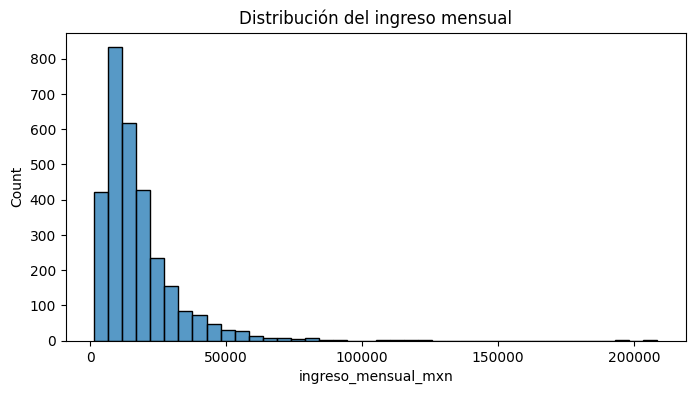

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["ingreso_mensual_mxn"], bins=40)
plt.title("Distribución del ingreso mensual")
plt.show()

4.2 Brackets de ingreso

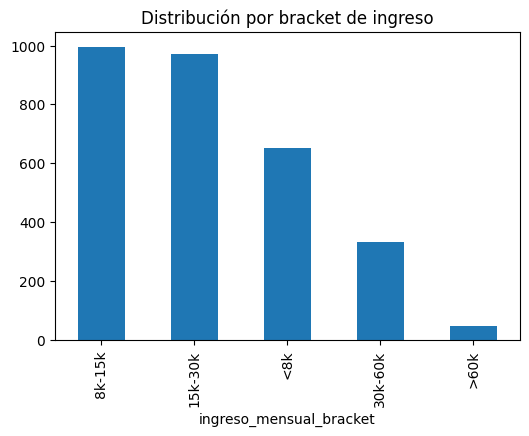

In [14]:
df["ingreso_mensual_bracket"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Distribución por bracket de ingreso")
plt.show()

4.3 Score Financiero

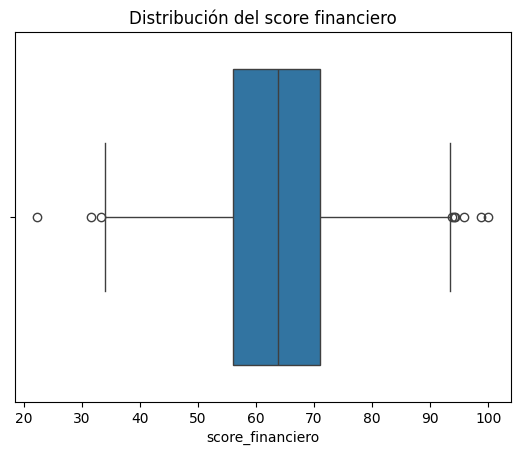

In [15]:
sns.boxplot(data=df, x="score_financiero")
plt.title("Distribución del score financiero")
plt.show()

###5.-Relación Ingreso vs Ahorro

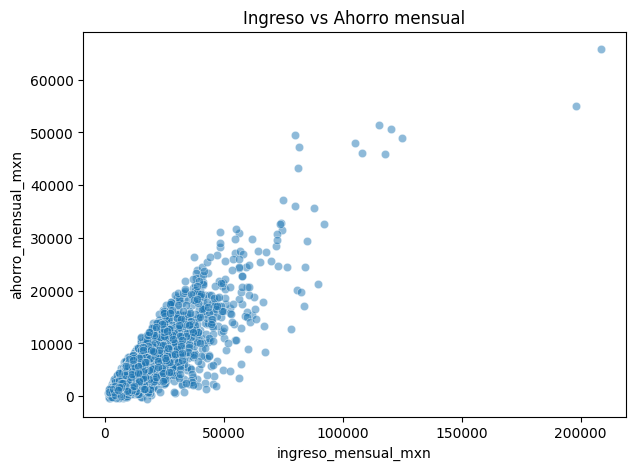

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="ingreso_mensual_mxn", y="ahorro_mensual_mxn", alpha=0.5)
plt.title("Ingreso vs Ahorro mensual")
plt.show()

### 7.- Preparar Datos para Machine Learning

K-Means clustering para segmentar personas por salud financiera.

In [17]:
features = df[[
    "ingreso_mensual_mxn",
    "gasto_fijo_mxn",
    "gasto_variable_mxn",
    "ahorro_mensual_mxn",
    "deuda_total_mxn",
    "uso_tarjeta_credito_pct",
    "score_financiero"
]]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

###8.- Entrenar K-means (tres clusters)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster_financiero"] = kmeans.fit_predict(X_scaled)

df.groupby("cluster_financiero")[["score_financiero","ingreso_mensual_mxn","ahorro_mensual_mxn"]].mean().round(2)

,score_financiero,ingreso_mensual_mxn,ahorro_mensual_mxn
cluster_financiero,,,
0,56.97,13075.67,3982.50
1,63.07,45862.01,15619.61
2,70.89,13778.67,5752.11


###9.- Visualización de Clusters

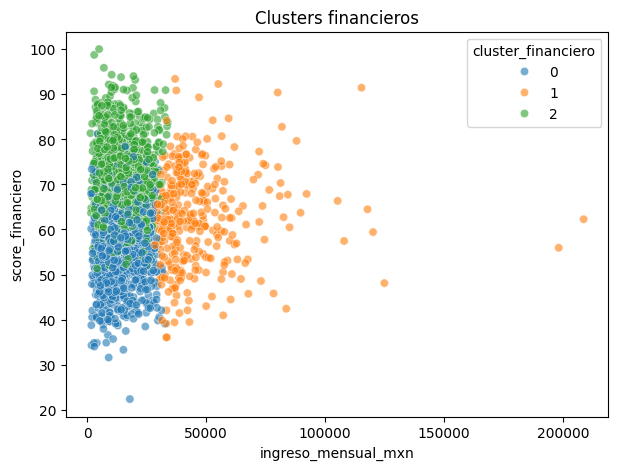

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="ingreso_mensual_mxn",
    y="score_financiero",
    hue="cluster_financiero",
    palette="tab10",
    alpha=0.6
)
plt.title("Clusters financieros")
plt.show()

###9.- Interpretación de clusters

In [21]:
for c in sorted(df.cluster_financiero.unique()):
    sub = df[df.cluster_financiero==c]
    print(f"\n=== Cluster {c} ===")
    print("Personas:", len(sub))
    print("Ingreso promedio:", sub.ingreso_mensual_mxn.mean().round(2))
    print("Ahorro promedio:", sub.ahorro_mensual_mxn.mean().round(2))
    print("Deuda promedio:", sub.deuda_total_mxn.mean().round(2))
    print("Score promedio:", sub.score_financiero.mean().round(2))


=== Cluster 0 ===
Personas: 1340
Ingreso promedio: 13075.67
Ahorro promedio: 3982.5
Deuda promedio: 3954.52
Score promedio: 56.97

=== Cluster 1 ===
Personas: 368
Ingreso promedio: 45862.01
Ahorro promedio: 15619.61
Deuda promedio: 3845.2
Score promedio: 63.07

=== Cluster 2 ===
Personas: 1292
Ingreso promedio: 13778.67
Ahorro promedio: 5752.11
Deuda promedio: 5510.51
Score promedio: 70.89
